Сегодня наборы данных обычно содержат сотни, если не тысячи функций. На первый взгляд, это может показаться хорошей вещью — дополнительные функции дают больше информации о каждом образце. Но чаще всего эти дополнительные функции не приносят такой уж большой пользы и вносят ненужную сложность.

Самая большая проблема машинного обучения заключается в создании моделей, обладающих высокой прогностической способностью, используя как можно меньше функций. Но, учитывая огромные размеры современных наборов данных, легко упустить из виду, какие функции важны, а какие нет.

Вот почему в области ML необходимо овладеть целым навыком — выбором функций. Выбор функций - это процесс выбора подмножества наиболее важных функций при попытке сохранить как можно больше информации.

В качестве примера предположим, что у нас есть набор данных об измерениях тела, таких как вес, рост, ИМТ и т.д. Базовые методы отбора признаков должны позволять снизить ИМТ, выяснив, что ИМТ может быть представлен весом и ростом.

Рассмотрим один из таких методов выбора признаков, называемый пороговым значением дисперсии. Этот метод представляет собой быстрый и легкий способ устранения объектов с очень низкой дисперсией, то есть объектов с небольшим количеством полезной информации.

Для тех, кто не знаком, дисперсия показывает изменчивость распределения по одному показателю. Он показывает, насколько распределено распределение, и показывает среднее квадратическое расстояние от среднего значения:

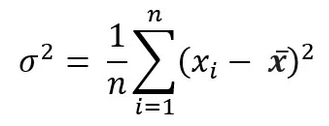

Очевидно, что распределения с большими значениями дают большую дисперсию, потому что каждая разница возведена в квадрат. Но главное, о чем мы заботимся в ML, - это то, чтобы распределение действительно содержало полезную информацию. Например, рассмотрим это распределение:

In [1]:
import numpy as np
dist_1 = [2, 2, 2, 2, 2, 2, 2, 2]
np.std(dist_1)

0.0

Вычисление дисперсии с помощью Numpy показывает нам, что распределение имеет дисперсию 0 или, другими словами, совершенно бесполезно. Использование функции с нулевой дисперсией только увеличивает сложность модели, но не ее прогностическую способность. Рассмотрим еще один вариант:

In [2]:
dist_2 = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6]
np.std(dist_2)

0.28747978728803447

Аналогично, этот параметр почти состоит из одной константы. Распределения, которые обходятся вокруг одной константы, за несколькими исключениями, также бесполезны. Другими словами, любой признак или распределение с дисперсией, близкой к 0, должны быть отброшены.

# Как использовать пороговую оценку отклонения Scikit-learn

Ручное вычисление отклонений и установление их порогового значения может оказаться большой работой. К счастью, Scikit-learn предоставляет средство оценки порога отклонения, которое может выполнить всю работу за нас. Просто установите пороговое значение, и все функции ниже этого порога будут удалены.

Чтобы продемонстрировать порог дисперсии, мы будем работать с набором данных Ansur. Этот набор данных регистрирует измерения человеческого тела всеми мыслимыми способами. Наборы данных как для мужчин, так и для женщин содержат 108 характеристик или измерений почти 6000 (4000 мужчин, 2000 женщин) военнослужащих армии США. Мы сосредоточимся на наборе данных для мужчин:

In [3]:
import pandas as pd
ansur_male = pd.read_csv('ansur_male.csv', encoding='latin').drop('subjectid', axis=1)

In [4]:
ansur_male.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [5]:
ansur_male.shape

(4082, 107)

Во-первых, давайте избавимся от объектов с нулевой дисперсией. Мы импортируем порог отклонения из sklearn.feature_selection:

In [6]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold()

Значение порога по умолчанию всегда равно 0. Кроме того, очевидно, что оценщик работает только с числовыми данными, и он выдаст ошибку, если во фрейме данных присутствуют категориальные признаки. Вот почему на данный момент мы будем подмножествовать числовые объекты в другой фрейм данных:

In [7]:
ansur_male_num = ansur_male.select_dtypes(include='number')
ansur_male_num.shape

(4082, 98)

Итак, у нас есть 98 числовых признаков. Давайте теперь сопоставим оценку с данными и получим ее результаты:

In [8]:
transformed = vt.fit_transform(ansur_male_num)
transformed

array([[ 266, 1467,  337, ...,   41,   71,  180],
       [ 233, 1395,  326, ...,   35,   68,  160],
       [ 287, 1430,  341, ...,   42,   68,  205],
       ...,
       [ 264, 1394,  313, ...,   23,   67,  186],
       [ 203, 1417,  327, ...,   22,   69,  165],
       [ 327, 1523,  358, ...,   38,   73,  218]])

Вызов fit_transform вернет фрейм данных в виде массива numpy с удаленными функциями. Но иногда мы не хотим, чтобы результат был в этом формате, потому что имена столбцов будут удалены. Рассмотрите альтернативу:

In [9]:
_ = vt.fit(ansur_male_num)
mask = vt.get_support()
ansur_male_num = ansur_male_num.loc[:, mask]
ansur_male_num.shape

(4082, 98)

Сначала мы сопоставляем оценщик с данными и вызываем его метод get_support(). Он возвращает логическую маску с истинными значениями для столбцов, которые не удаляются. Затем мы можем использовать эту маску для подмножества нашего фрейма данных. У нас по-прежнему есть то же количество функций. Теперь давайте отбросим объекты с отклонениями, близкими к 0:

In [10]:
vt = VarianceThreshold(threshold=1)

# Fit
_ = vt.fit(ansur_male_num)

# Get the boolean mask
mask = vt.get_support()

ansur_reduced = ansur_male_num.loc[:, mask]
ansur_reduced.shape

(4082, 97)

При пороге, равном 1, была удалена только 1 функция.

## Справедливое сравнение дисперсии с нормализацией признаков

Часто несправедливо сравнивать дисперсию одного признака с другим. Причина в том, что по мере увеличения значений в распределении дисперсия растет экспоненциально. Другими словами, различия не будут в одном и том же масштабе. Рассмотрим этот пример:

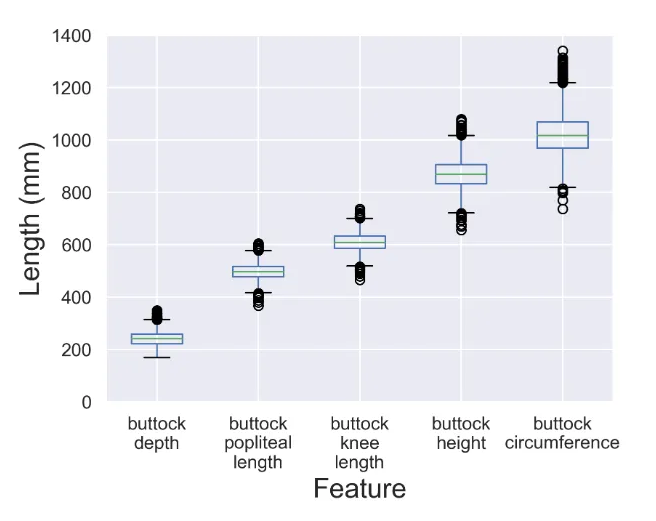

Все вышеперечисленные функции имеют разные медианы, квартили и диапазоны — совершенно разные распределения. Мы не можем сравнивать эти характеристики друг с другом.

Один из методов, который мы можем использовать, - это нормализация всех признаков путем деления их на среднее значение:

In [11]:
normalized_df = ansur_male_num / ansur_male_num.mean()
normalized_df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
0,1.044567,1.018229,1.005237,0.967978,1.013481,1.003900,1.005300,0.964694,1.030336,0.994796,...,1.135066,0.997648,0.952949,0.994789,1.006476,0.111439,0.651868,1.359462,1.013768,0.957422
1,0.914978,0.968255,0.972425,0.959258,0.972852,0.972156,0.960509,0.947854,0.943776,0.933075,...,0.957067,0.997648,0.848885,0.949313,0.961639,0.111439,0.651868,1.160516,0.970932,0.851042
2,1.127033,0.992548,1.017168,1.002861,0.998433,1.015804,0.975439,1.027243,1.139233,0.947598,...,1.060254,0.985343,1.086245,1.023212,0.980518,0.222877,1.303737,1.392620,0.970932,1.090397
3,0.918905,0.934938,0.924698,1.002861,0.932222,1.039612,0.990370,0.964694,1.002413,0.951228,...,1.029298,0.916246,0.928395,1.000473,0.935681,0.111439,0.651868,1.027886,0.942376,0.930827
4,0.981736,1.100131,1.109638,1.076985,1.112046,1.059452,1.114788,1.046489,0.994037,0.954859,...,0.977704,1.178436,1.106123,1.068688,1.125648,0.222877,1.303737,0.696310,1.099438,1.132949


Этот метод гарантирует, что все отклонения находятся в одном масштабе:

In [12]:
normalized_df.var()

abdominalextensiondepthsitting     0.021486
acromialheight                     0.001930
acromionradialelength              0.002720
anklecircumference                 0.004080
axillaheight                       0.002005
                                    ...    
SubjectNumericRace                85.577697
DODRace                            0.390651
Age                                0.085336
Heightin                           0.001771
Weightlbs                          0.025364
Length: 98, dtype: float64

In [13]:
ansur_male_num.var()

abdominalextensiondepthsitting    1393.318192
acromialheight                    4005.275036
acromionradialelength              305.648126
anklecircumference                 214.596201
axillaheight                      3542.168955
                                     ...     
SubjectNumericRace                6891.098050
DODRace                              0.919325
Age                                 77.618186
Heightin                             8.687277
Weightlbs                          896.515536
Length: 98, dtype: float64

Теперь мы можем использовать оценщик с более низким порогом, таким как 0,005 или 0,003:

In [14]:
vt = VarianceThreshold(threshold=.003)

# Fit
_ = vt.fit(normalized_df)

# Get the mask
mask = vt.get_support()

# Subset the DataFrame
ansur_final = ansur_male_num.loc[:, mask]

In [15]:
ansur_final.shape

(4082, 48)

Как вы можете видеть, нам удалось удалить 50 объектов из набора данных. Теперь давайте проверим, правильно ли мы поступили, отказавшись от такого количества функций.

Мы проверим это, обучив два RandomForestRegressor предсказывать вес человека в фунтах: первый для конечного набора данных, выбранного по признакам, и второй для полного набора данных, содержащего только числовые признаки.

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import time

start = time.time()
# Build feature, target arrays
X, y = ansur_final.iloc[:, :-1], ansur_final.iloc[:, -1]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1121218)

# Init, fit, score
forest = RandomForestRegressor(random_state=1121218)

_ = forest.fit(X_train, y_train)

end = time.time()
print(end - start)

print(f"Training Score: {forest.score(X_train, y_train)}")
print(f"Test Score: {forest.score(X_test, y_test)}")

4.022510766983032
Training Score: 0.988528867222243
Test Score: 0.9511616691995844


Как обучение, так и результаты тестов предполагают действительно высокую производительность без переобучения. Теперь давайте обучим ту же модель на полном наборе данных, содержащем только числовые данные:

In [17]:
start = time.time()
# Build feature, target arrays
X, y = ansur_male_num.iloc[:, :-1], ansur_male_num.iloc[:, -1]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1121218)

# Init, fit, score
forest = RandomForestRegressor(random_state=1121218)

_ = forest.fit(X_train, y_train)

end = time.time()
print(end - start)
print(f"Training Score: {forest.score(X_train, y_train)}")
print(f"Test Score: {forest.score(X_test, y_test)}")

8.09596586227417
Training Score: 0.9886396641558658
Test Score: 0.9495977505935259


Как вы можете видеть, даже отказавшись от 50 функций, мы смогли создать довольно мощную модель.

Несмотря на то, что пороговое значение дисперсии является простым методом, оно может иметь большое значение при выполнении выбора объекта. Однако имейте в виду, что этот метод не учитывает взаимосвязь между объектами или связь между объектами и целью. Поэтому всегда перепроверяйте, что использование VT повышает производительность или, по крайней мере, снижает сложность модели, делая что-то подобное тому, что мы сделали с RandomForestRegressor.

# DBSCAN

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

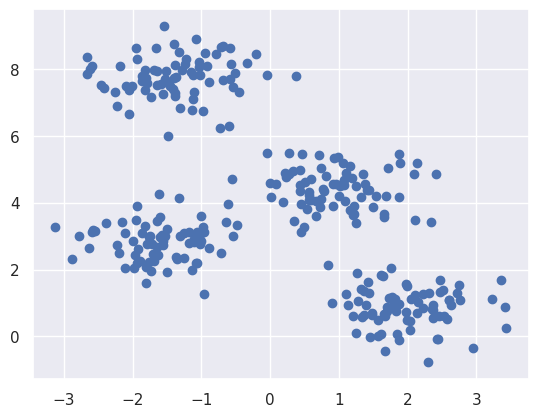

In [3]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

Мы должны предоставить значение для эпсилона, которое определяет максимальное расстояние между двумя точками.
Мы находим подходящее значение для эпсилон путем расчета расстояния до ближайшего N. Затем мы смотрим, где изменение наиболее выражено (представьте себе угол между рукой и предплечьем) и выбираем его как эпсилон.

In [6]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

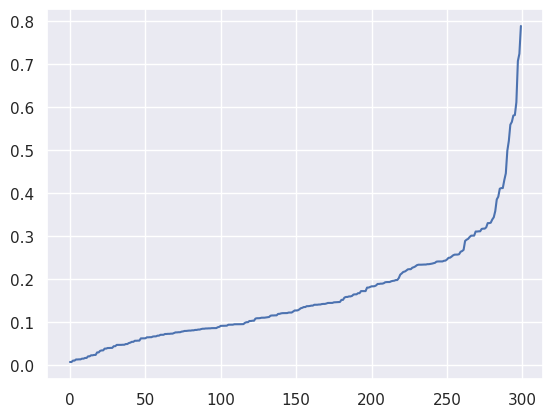

In [8]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [9]:
m = DBSCAN(eps=0.3, min_samples=5)
m.fit(X)

DBSCAN(eps=0.3)

In [10]:
clusters = m.labels_

In [11]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

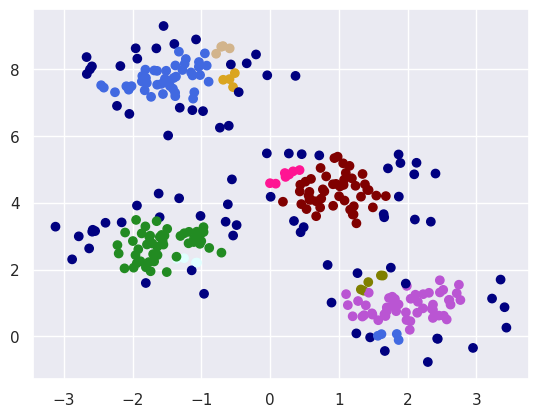

In [12]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

Модель классифицирует густонаселенные районы. Как мы видим, все синие точки были классифицированы как шум.